# Анализ и прогнозирование неоднородных временных рядов

##  2022-23 учебный год

### Домашнее задание №5. Анализ и прогнозирование временных рядов

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 10.12.2022

__Дедлайн:__ 04:00 27.12.2022

### Оценивание и штрафы

Каждое задание оценивается в разное количество баллов. Балл за задание указан в скобках после номера задания.

Общая максимальная сумма баллов по всем заданиям составляет: 138 баллов и 73 бонусных балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{ts}} \times 10/138 ,
$$

где $s_{\text{ts}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

При этом, поскольку бонусные баллы суммируются вместе с обычными, имеется возможность получить оценку выше 10 за это ДЗ. Таким образом, исходя из общей суммы баллов, максимально возможная оценка за ДЗ составляет 15,28.



*Примечание. Домашнее задание из-за своего объема весит как два домашних задания в итоговой формуле оценки.*

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе . Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

Проблемой короновируса COVID-19, беспокоившего весь мир на протяжении последних нескольких лет, занимались и занимаются ученые по всему миру. В стороне не осталось и комьюнити Data scientist-ов, которые не только пытались в момент пандемии предсказать ее развитие, но также старались помочь определить наиболее значимые факторы, влияющие на распространение заразы. Например на небезызвестном [Kaggle](https://www.kaggle.com/tags/covid19).

В данном домашнем задании вы попрактикуетесь в анализе и прогнозировании временных рядов, работая с ежедневно обновлявшимися во время пандемии данными из [репозитория](https://github.com/datasets/covid-19), а конкретно [time-series-19-covid-combined.csv](https://github.com/datasets/covid-19/blob/master/data/time-series-19-covid-combined.csv).

Вам предстоит изучить имеющиеся данные, попробовать найти некоторые закономерности и ответить на вопросы. Ниже представлены задания как исследовательского характера, где приветствуется инициативность, так и чисто тренировочного характера - где необходимо использовать изученные на семинаре инструменты для работы с временными рядами. **Не забывайте сопровождать ваш код развернутыми комментариями и выводами.** Чем их больше и чем они качественнее, тем лучше и выше вероятность получения максимальной оценки за домашнее задание. Не болейте!

In [85]:
!pip install orbit-ml
!pip install orbit
!pip install prophet
!pip install sktime[all_extras]
pip install sktime

In [86]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sma
import statsmodels.formula.api as smf

import statsmodels.tsa.stattools as smstt
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

In [87]:
df = pd.read_csv('time-series-19-covid-combined.csv')
df.tail()
df.head(10)

df.dtypes



Date               object
Country/Region     object
Province/State     object
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

## Раздел 1. Первичный анализ временных рядов (45 баллов и 15 бонусных баллов)

#### 1.1. (5 баллов) 

Определите границы исследуемого периода, количество заболевших, погибших, выздоровивших. Отобразите на карте распространение болезни. Что вы видите? Какие выводы можно сделать?

In [88]:
# Ваш код здесь

df.columns = ['Date',	'Country',	'State',	'Confirmed',	'Recovered',	'Deaths']
df.head()

# df.groupby('Region')[]

#Границы исследуемого периода:
min(df.Date), max(df.Date)
# ('2020-01-22', '2022-04-16')

# Количество заболевших, погибших, выздоровивших за весь период: 
max(df.Confirmed), max(df.Deaths), max(df.Recovered)



(80625120, 988609, 30974748.0)

#### 1.2. (5 баллов)

Определите количество стран, которые подтвердили случаи заражения 
- на 1 марта 2020 года
- на 1 июня 2020 года
- на 1 октября 2020 года
- на 1 января 2021 года
- на 1 января 2022 года
- на момент окончания исследуемого периода.

Визуализируйте рост количества стран, подтвердивших случаи заражения
- по дням 
- по неделям
- по месяцам. 


Какие выводы можно сделать из этих графиков?

  *Примечание. В анализе временных рядов иногда необходимо изменить частоту дискретизации (Resampling). Такая операция может понадобится, когда имеющихся данных недостаточно или их, наоборот, слишком много. Может не устраивать имеющаяся частота или просто хочется посмотреть на данные с более общего ракурса.*

  *Различают два вида изменения частоты: повышение (Upsampling) и понижение (Downsampling). При повышении временной ряд пересчитывается с низкой частоы на более высокую частоту (например от годовой до месячной частоты). В таком случае процесс включает в себя заполнение или интерполяцию появившихся пропусков в данных. При понижении временной ряд передискретизируется с высокой частоты на низкую (наример с еженедельной на месячную частоту). Это включает в себя агрегацию существующих данных.*

In [89]:
from numpy.lib.arraysetops import unique
# Ваш код здесь

cond0 = df['Confirmed']  != 0
cond1 = cond0 & (df['Date'] == '2020-03-01')
cond2 = cond0 & (df['Date'] == '2020-06-01')
cond3 = cond0 & (df['Date'] == '2020-10-01')
cond4 = cond0 & (df['Date'] == '2021-01-01')
cond5 = cond0 & (df['Date'] == '2022-01-01')
cond6 = cond0 & (df['Date'] == '2022-04-16')


n1 = df[cond1]['Country'].nunique() #067
n2 = df[cond2]['Country'].nunique() #187
n3 = df[cond3]['Country'].nunique() #187
n4 = df[cond4]['Country'].nunique() #191
n5 = df[cond5]['Country'].nunique() #197
n6 = df[cond6]['Country'].nunique() #198

print(n1, n2, n3, n4, n5,n6)


67 187 187 191 197 198


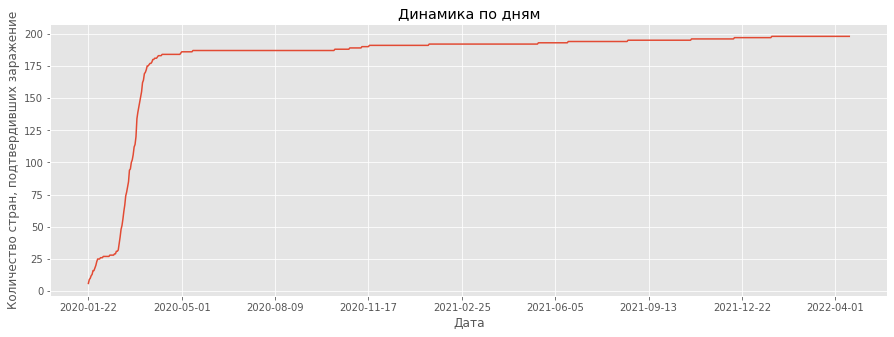

In [90]:
# Визуализация роста количества стран, подтвердивших случаи заражения
# по дням


df[cond0][['Date', 'Country']].drop_duplicates().groupby('Date')['Date'].count().head(10)

g1 = df[cond0][['Date', 'Country']].drop_duplicates().groupby('Date')['Date'].count()

# figsize =(5, 5)
plt.rcParams['figure.figsize'] = (15, 5)
g1.plot(title = 'Динамика по дням',  xlabel = 'Дата',  ylabel = 'Количество стран, подтвердивших заражение')



In [91]:
df['Date3'] = pd.to_datetime(df.Date)


df.dtypes
df.head()

df['Year'] = df.Date3.dt.year #возвращает год даты 
df['Month'] = df.Date3.dt.month #
df['Day'] = df.Date3.dt.day #  
df['Dayofweek']  = df.Date3.dt.dayofweek #  
df.head()

,Date,Country,State,Confirmed,Recovered,Deaths,Date3,Year,Month,Day,Dayofweek
0,2020-01-22,Afghanistan,NaN,0,0.00,0,2020-01-22,2020,1,22,2
1,2020-01-23,Afghanistan,NaN,0,0.00,0,2020-01-23,2020,1,23,3
2,2020-01-24,Afghanistan,NaN,0,0.00,0,2020-01-24,2020,1,24,4
3,2020-01-25,Afghanistan,NaN,0,0.00,0,2020-01-25,2020,1,25,5
4,2020-01-26,Afghanistan,NaN,0,0.00,0,2020-01-26,2020,1,26,6


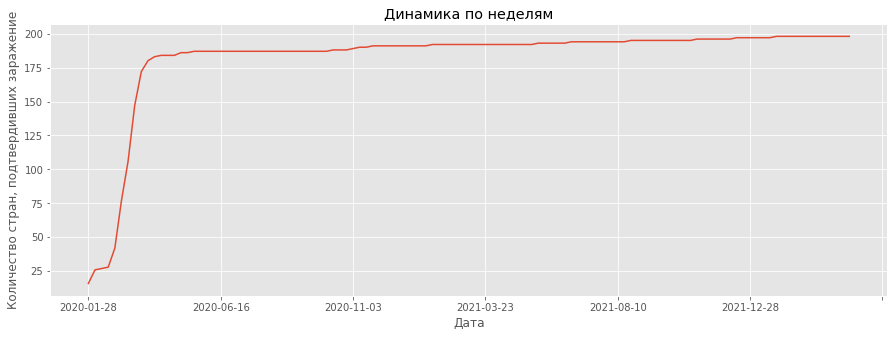

In [92]:
# Визуализация роста количества стран, подтвердивших случаи заражения
# по неделям
cond9 = cond0 & (df['Dayofweek'] == 1)
g1 = df[cond9][['Date', 'Country']].drop_duplicates().groupby('Date')['Date'].count()

plt.rcParams['figure.figsize'] = (15, 5)
g1.plot(title = 'Динамика по неделям',  xlabel = 'Дата',  ylabel = 'Количество стран, подтвердивших заражение')





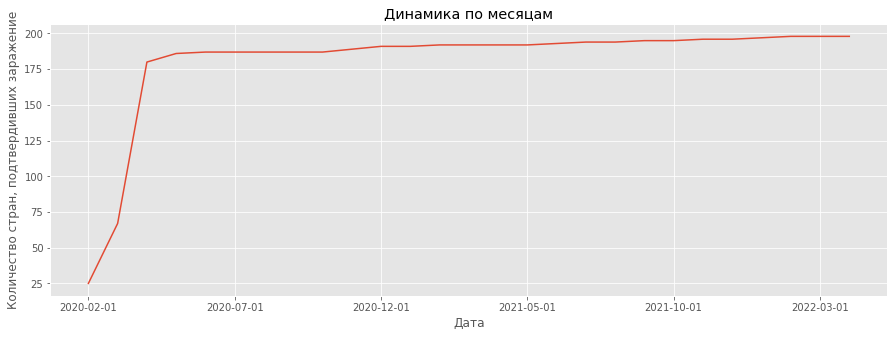

In [93]:
# Визуализация роста количества стран, подтвердивших случаи заражения
# по месяцам
cond8 = cond0 & (df['Day'] == 1)
g1 = df[cond8][['Date', 'Country']].drop_duplicates().groupby('Date')['Date'].count()
g1.plot(title = 'Динамика по месяцам',  xlabel = 'Дата',  ylabel = 'Количество стран, подтвердивших заражение')



#### 1.3. (5 баллов)


Визуализируйте мировые тренды по числу 

- заболевших 
- погибших 
- выздоровивших.

Постройте графики, которые отражают летальность от вируса 

- в разных странах 
- на разных континентах. 

Какие выводы можно сделать?

In [94]:
# Ваш код здесь

# Визуализация роста количества стран, подтвердивших случаи заражения
# по дням

g1 = df[cond0][['Date', 'Country']].drop_duplicates().groupby('Date')['Date'].count()

# figsize =(5, 5)
plt.rcParams['figure.figsize'] = (15, 5)


g2 = df.groupby('Date')['Confirmed',	'Recovered', 'Deaths'].sum()




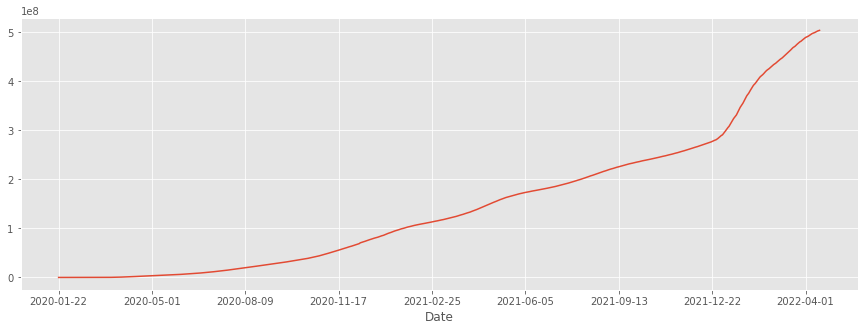

In [95]:
g2['Confirmed'].plot()


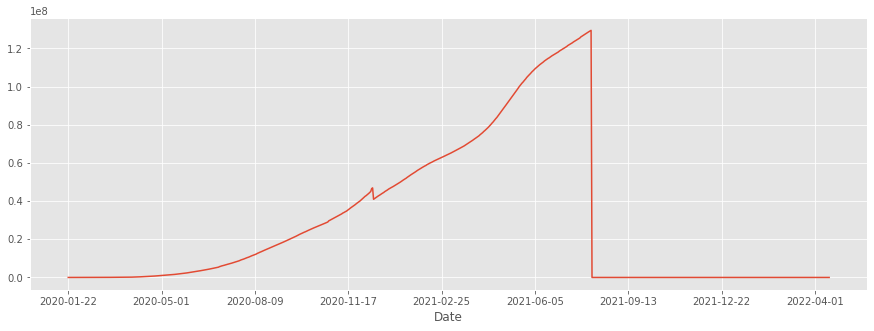

In [96]:
g2['Recovered'].plot()


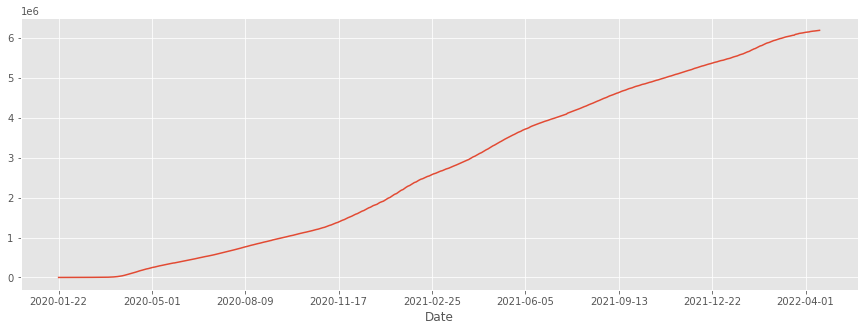

In [97]:
g2['Deaths'].plot()

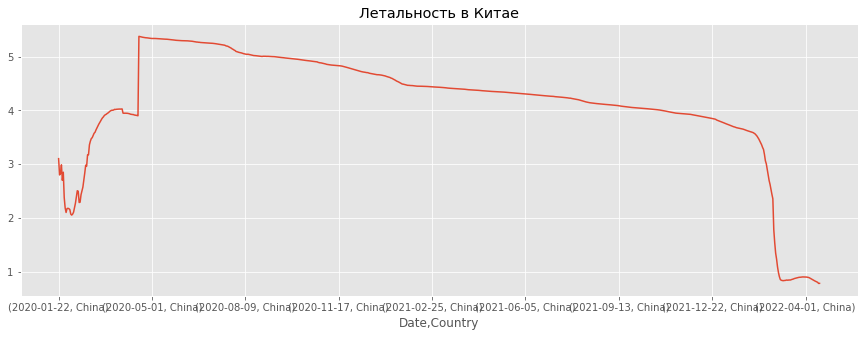

In [98]:
# графики, которые отражают летальность от вируса

# в разных странах
# на разных континентах.


cond8 = df['Day'] == 1

cond_m1 = df['Country'].isin(['China']) 
cond_m2 = df['Country'].isin(['US']) 
cond_m3 = df['Country'].isin(['Russia']) 


gm1 = df[cond_m1].groupby(['Date', 'Country'])['Confirmed',	'Recovered', 'Deaths'].sum()
gm2 = df[cond_m2].groupby(['Date', 'Country'])['Confirmed',	'Recovered', 'Deaths'].sum()
gm3 = df[cond_m2].groupby(['Date', 'Country'])['Confirmed',	'Recovered', 'Deaths'].sum()

gm1['Mortality'] = gm1['Deaths'] / gm1['Confirmed'] * 100
gm2['Mortality'] = gm2['Deaths'] / gm2['Confirmed'] * 100
gm3['Mortality'] = gm2['Deaths'] / gm2['Confirmed'] * 100


gm1['Mortality'].plot(title ='Летальность в Китае')

#title = 'Динамика количества стран, подтвердивших заражение, по дням',  xlabel = 'Дата',  ylabel = 'Количество стран'


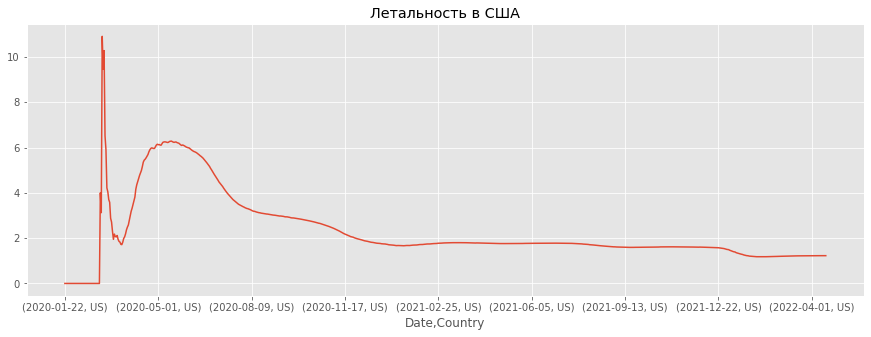

In [99]:
gm2['Mortality'].plot(title ='Летальность в США')


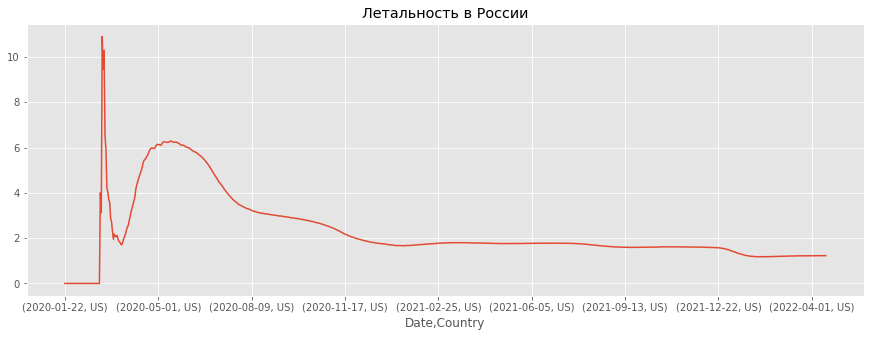

In [100]:
gm3['Mortality'].plot(title ='Летальность в России')


#### 1.4. (5 баллов)

Визуализируйте и сравните, как распространялась болезнь в разных странах и на разных континентах по дням с первого зарегистрированного случая заболевания. Определите количество дней для каждой страны со дня первого зарегестрированного случая. Какие тенденции вы видите?

In [101]:
# Ваш код здесь

# Начало ковида (первый случай)
df[cond0]['Date'].sort_values().head(1) # 2020-01-22

70992    2020-01-22
Name: Date, dtype: object

In [102]:
# количество дней для каждой страны со дня первого зарегестрированного случая


delta = df[cond0].groupby('Country').agg({ 'Date3':min   }) 

delta["days_delta"] = (delta["Date3"] - pd.to_datetime("2020-01-22")).dt.days
delta

,Date3,days_delta
Country,,
Afghanistan,2020-02-24,33
Albania,2020-03-09,47
Algeria,2020-02-25,34
Andorra,2020-03-02,40
Angola,2020-03-20,58
...,...,...
West Bank and Gaza,2020-03-05,43
Winter Olympics 2022,2022-01-23,732
Yemen,2020-04-10,79


#### 1.5. (5 баллов)

Визуализируйте и оцените как развивалась ситуация в России по сравнению с остальными миром. Как вы будете осуществлять сравнение? Почему? Какие выводы можно сделать?

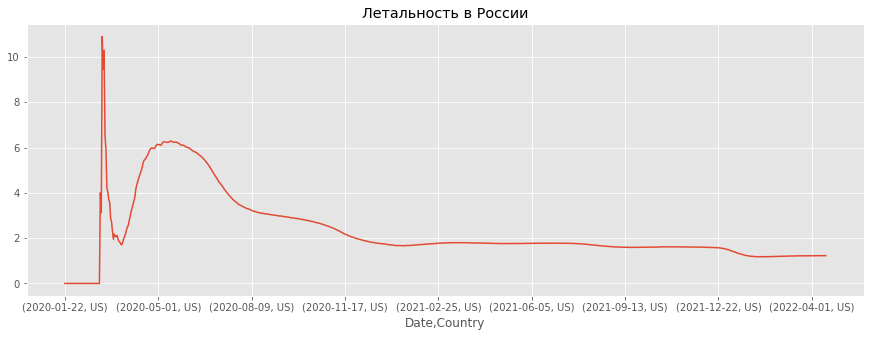

In [103]:
# Ваш код здесь
gm3['Mortality'].plot(title ='Летальность в России')

#### 1.6. (5 баллов)

Определите топ-10 стран, которые лидируют по имеющимся в датасете показателям. Постоянны ли эти лидеры? За какой временной промежуток было бы наиболее правильно брать лидеров, на ваш взгляд? Почему? Сравните насколько быстро развивается ситуация в этих странах. Определите корреляцию.

In [104]:
# Ваш код здесь
# Топ-10 стран по количеству подтвержденных заражений (за все время)
df.groupby('Country')[['Country','Confirmed']].max().sort_values('Confirmed', ascending = False).head(10)


,Country,Confirmed
Country,,
US,US,80625120
India,India,43042097
Brazil,Brazil,30250077
France,France,26955613
Germany,Germany,23416663
United Kingdom,United Kingdom,21747638
Russia,Russia,17801103
"Korea, South","Korea, South",16305752
Italy,Italy,15659835


In [105]:
# Топ-10 стран по количеству смертей (за все время)
df.groupby('Country')[['Country','Deaths']].max().sort_values('Deaths', ascending = False).head(10)

,Country,Deaths
Country,,
US,US,988609
Brazil,Brazil,662185
India,India,521751
Russia,Russia,365774
Mexico,Mexico,323938
Peru,Peru,212619
United Kingdom,United Kingdom,171396
Italy,Italy,161602
Indonesia,Indonesia,155844


#### 1.7. (5 баллов)

Для первых 5 стран из топ-10 из прошлого задания и России (суммарно 5 или 6 стран, в зависимости от того, входит ли Россия в топ) постройте сравнительные графики. Изучите как изменялись значения отношений 
- погибших/выздоровивших 
- погибших/заболевших 
- заболевших/общее число жителей
- еще один ваш вариант (что будет осмысленно здесь взять?)

Какие выводы можно сделать из подобного сравнения?

In [106]:
# Ваш код здесь




#### 1.8. (5 баллов и 15 бонусных баллов)

Изучаемый вами датасет отражает мировую статистику распространения болезни. Однако эти данные не дают нам возможности сделать предположения о возможных факторах, которые влияют на скорость распространения, летальность, заразность и тд. Поэтому в наш датасет можно добавить новые признаки из других наборов данных, которые могут не только помочь при прогнозировании временного ряда, но и определить наиболее значимые факторы.

- Добавьте новый признак "количество дней со дня первого случая заражения".
- Добавьте еще не менее 5 новых признаков в датасет, которые могут быть значимым фактором распространения вируса. Сохраните полученный датасет. Вы можете его использовать в третьей части домашнего задания (за это вы сможете получить там дополнительные бонусные баллы).
- Исследуйте, как добавленные признаки соотносятся с трендами распространения короновируса в некоторых странах. Сделайте выводы.

*Подсказка: некоторые примеры признаков (список далеко не исчерпывающий и лучше хотя бы несколько придумать своих): количество дней с начала карантина; конинент; плотность населения; количество употребляемого алкоголя; распространенность летучих мышей; количество крокодилов на душу населения; количество туристов в год; уровень безработицы; температура; количество игроков в Plague Inc.; средний возраст или продолжительность жизни; и так далее. Вы можете использовать любой найденный датасет. Главное, чтобы у Вас получилось скомбинировать данные.*

  Примеры датасетов для вас:
  1. [500 Cities: Local Data for Better Health (2019)](https://www.kaggle.com/jaimeblasco/500-cities-local-data-for-better-health-2019)
  2. [Daily global surface summary from over 9000 weather stations from 1929 to now](https://www.kaggle.com/noaa/gsod)
  3. [Population by Country - 2020](https://www.kaggle.com/tanuprabhu/population-by-country-2020)



In [107]:
# Ваш код здесь

#### 1.9. (5 баллов)

Какие закономерности и тенденции бросились вам в глаза в ходе проделанного в разделе 1 анализа? Что оказалось неожиданным, а что, наоборот, ожидаемым? Почему? Напишите итоговые выводы по проделанному вами первичному анализу данных в рамках данного раздела.

<здесь место для ваших выводов>

## Раздел 2. Статистический анализ и подготовка данных (28 баллов)


#### 2.1. (5 баллов)

В рамках задачи исследования и прогнозирования тенденций развития пандемии коронавируса, не очень интересно предсказывать количество заболевших/умерших к моменту окончания исследуемого периода данного датасета, поскольку все изменения значений будут близки к нулю - пандемия фактически уже окончилась. Какой в таком случае конец "известного" периода имело бы смысл взять? 

Также, с другой стороны: все ли данные от начала пандемии нам необходимы и полезны для анализа и прогнозирования? Почему? Обрежьте наш датасет с конца и (если необходимо) с начала, выделив тем самым интересующий нас рабочий период для анализа. Обязательно аргументируйте, почему вы решили взять период именно таким. Обрезку, на всякий случай, осуществляйте в копии датасета и сохраните исходный датасет на случай необходимости дополнительного анализа/анализа на других временных интервалах.

In [108]:
# Ваш код здесь

#### 2.2. (10 баллов)

Выделите временной ряд по одному из имеющихся у нас целевых признаков на ваш выбор. Для выделенного временного ряда проведите простой статистический анализ:

- Рассчитайте несколько первых лагов для временного ряда, выведите их на графике.
- Представьте временной ряд в виде последовательности разниц между значениями и визуализируйте её. Представьте его также в виде последовательности разниц разниц. Визуализируйте и это.
- Перейдите от временного ряда к логарифму временного ряда. Визуализируйте полученный ряд. Что можно сказать об изменениях?
- Осуществите декомпозицию временного ряда (тренд, сезонность, резидуалс). Постройте график тренда отдельно и график тренда на тех же осях, что и исходный временной ряд. Повторите проделанные действия для логарифма временного ряда. Имеется ли разница?
- Что вы можете сказать о стационарности временного ряда? Почему? Осуществите проверку на стационарность (желательно, с использованием методов математической статистики). Что можно сказать о стационарности последовательности разниц и последовательности разниц разниц? Также осуществите проверку на стационарность для этих рядов.

Какие выводы вы можете сделать из проделанного анализа?

In [109]:
cond_p1 = (df['Country'] == 'China') 

cond8 = df['Day'] == 1

df['Date'] = pd.to_datetime(df['Date'])


cond_m1 = df['Country'].isin(['China']) 
cond_m2 = df['Country'].isin(['US']) 
cond_m3 = df['Country'].isin(['Russia']) 

gm1 = df[cond_m1].groupby(['Date', 'Country'])['Confirmed',	'Recovered', 'Deaths'].sum()
gm2 = df[cond_m2].groupby(['Date', 'Country'])['Confirmed',	'Recovered', 'Deaths'].sum()
gm3 = df[cond_m3].groupby(['Date', 'Country'])['Confirmed',	'Recovered', 'Deaths'].sum()

gm1['Mortality'] = gm1['Deaths'] / gm1['Confirmed'] * 100
gm2['Mortality'] = gm2['Deaths'] / gm2['Confirmed'] * 100
gm3['Mortality'] = gm2['Deaths'] / gm2['Confirmed'] * 100



g1 = df[cond_m1]
g2 = df[cond_m2]
g3 = df[cond_m3]


g1 = g1.sort_values(by = "Date")
g1.index = pd.PeriodIndex(g1.Date, freq='M')


g1.index = g1.index.to_timestamp()




In [110]:
# Ваш код здесь


# Декомпозируем наш временной ряд на тренд и сезонность

from statsmodels.tsa.seasonal import seasonal_decompose


In [111]:
# Декомпозиция динамики заражений для США
plt.rcParams['figure.figsize'] = (20, 20)
# decomposition = seasonal_decompose(g1.Confirmed, model = "additive")
# decomposition.plot()

In [112]:
# Декомпозиция динамики заражений для Китая
plt.rcParams['figure.figsize'] = (20, 20)
# decomposition = seasonal_decompose(g2.Confirmed, model = "additive")
# decomposition.plot()



In [113]:
# Декомпозиция динамики заражений для России
plt.rcParams['figure.figsize'] = (20, 20)
# decomposition = seasonal_decompose(g3.Confirmed, model = "additive")
# decomposition.plot()

#### 2.3. (8 баллов)

Для выбранного вами в предыдущем задании временного ряда и еще одного любого постройте графики ACF и PACF. Что показывают эти функции и что можно увидеть на графиках? Прокомментируйте полученные результаты: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда? В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.


In [114]:
# Ваш код здесь

# ACF и PACF 
from statsmodels.tsa.stattools import acf, pacf

ts1 = gm1.Mortality
ts2 = gm2.Mortality


gm1["MortalityShift1"] = gm1.Mortality.shift()
gm1["MortalityDiff"] = gm1.Mortality - gm1.MortalityShift1


gm2["MortalityShift1"] = gm2.Mortality.shift()
gm2["MortalityDiff"] = gm2.Mortality - gm2.MortalityShift1


ts_diff1 = gm1.MortalityDiff
ts_diff1.dropna(inplace = True)

ts_diff2 = gm2.MortalityDiff
ts_diff2.dropna(inplace = True)


lag_acf1 = acf(ts_diff1, nlags=20)
lag_acf1


array([ 1.        ,  0.12284239,  0.15561009,  0.1087517 ,  0.0912955 ,
        0.12586062,  0.11109765,  0.10582634,  0.07299231,  0.07930096,
        0.06242102,  0.03298648,  0.03778673,  0.02223059,  0.03660356,
        0.05001454,  0.04714615, -0.02073291,  0.00679039, -0.00928847,
       -0.01389454])

In [115]:
ACF = pd.Series(lag_acf1)

ACF

0     1.00
1     0.12
2     0.16
3     0.11
4     0.09
5     0.13
6     0.11
7     0.11
8     0.07
9     0.08
10    0.06
11    0.03
12    0.04
13    0.02
14    0.04
15    0.05
16    0.05
17   -0.02
18    0.01
19   -0.01
20   -0.01
dtype: float64

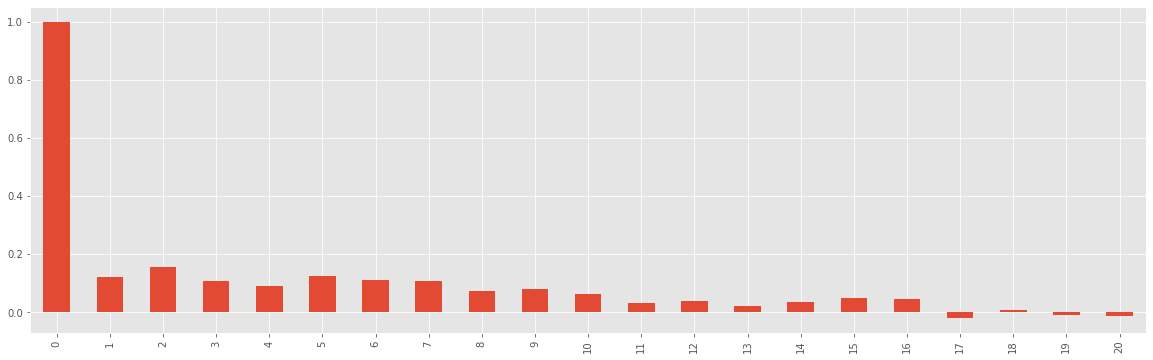

In [116]:
plt.rcParams['figure.figsize'] = (20, 6)
ACF.plot(kind = "bar")

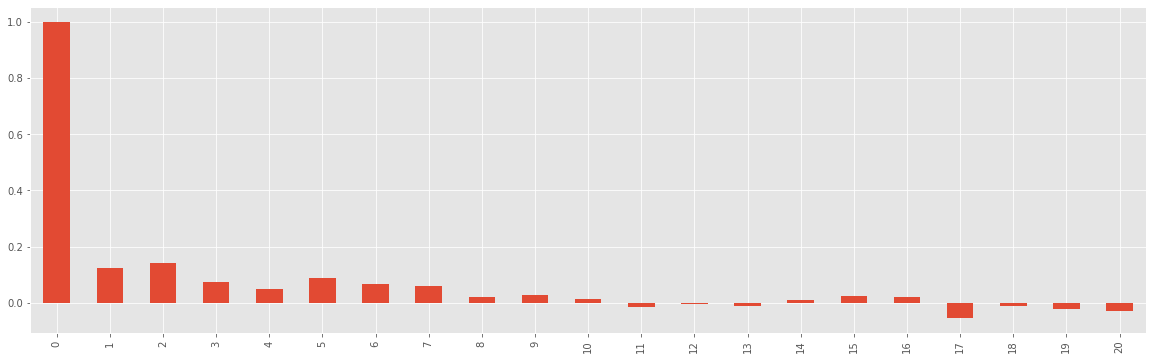

In [117]:
plt.rcParams['figure.figsize'] = (20, 6)
lag_pacf1 = pacf(ts_diff1, nlags=20, method='ols')
PACF = pd.Series(lag_pacf1)
PACF.plot(kind = "bar")

In [118]:
# Автокорреляции для второго ряда

lag_acf2 = acf(ts_diff2, nlags=20)
lag_acf2


array([ 1.        , -0.21124911,  0.52349155, -0.34141531,  0.07398168,
       -0.2572156 ,  0.02295017, -0.07527907,  0.01734526, -0.04833879,
       -0.01023272, -0.04375798, -0.0277304 ,  0.01004834, -0.01375924,
        0.01371057,  0.00469414, -0.01134118, -0.00681228, -0.01459521,
       -0.01995249])

In [119]:
ACF2 = pd.Series(lag_acf2)
ACF2


0     1.00
1    -0.21
2     0.52
3    -0.34
4     0.07
5    -0.26
6     0.02
7    -0.08
8     0.02
9    -0.05
10   -0.01
11   -0.04
12   -0.03
13    0.01
14   -0.01
15    0.01
16    0.00
17   -0.01
18   -0.01
19   -0.01
20   -0.02
dtype: float64

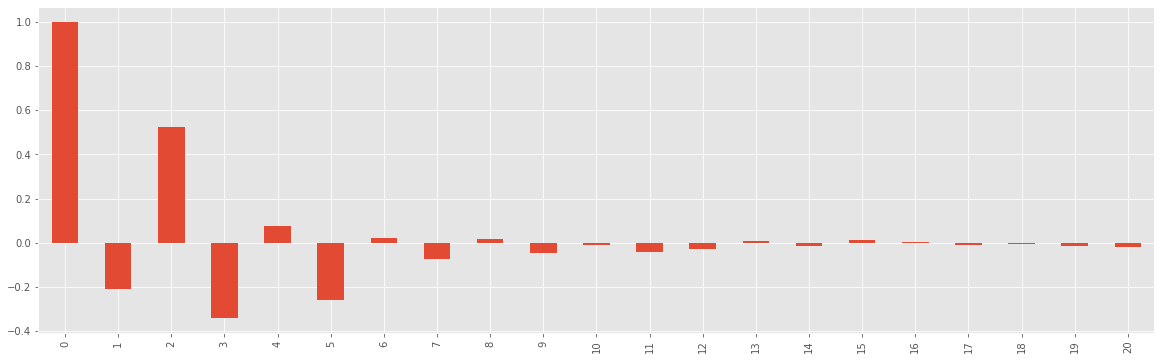

In [120]:
plt.rcParams['figure.figsize'] = (20, 6)
ACF2.plot(kind = "bar")

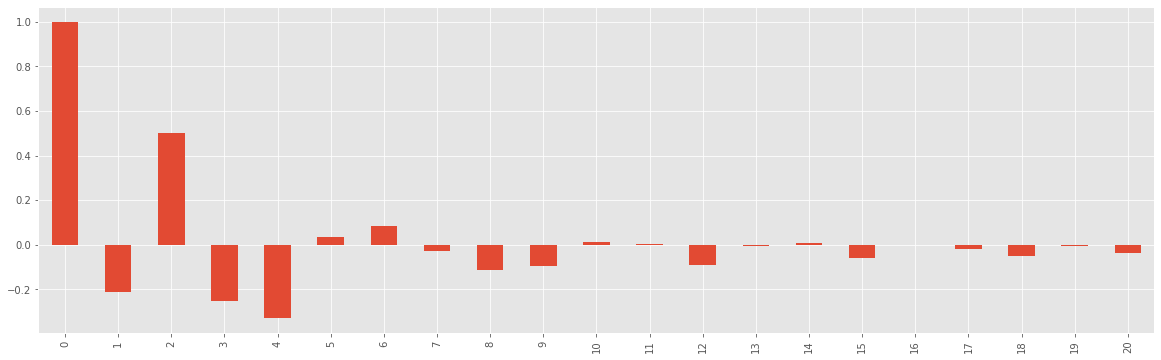

In [121]:
plt.rcParams['figure.figsize'] = (20, 6)
lag_pacf2 = pacf(ts_diff2, nlags=20, method='ols')
PACF2 = pd.Series(lag_pacf2)
PACF2.plot(kind = "bar")


#### 2.4. (5 баллов)

Вспомним, что для прогнозирования временного ряда необходимо разделить выборку на две составляющие (train и test). На составляющей train наша модель обучается и настраивает свои параметры, на составляющей test модель осуществляет предсказание (а затем мы можем это предсказание сравнить с реальными данными)

Осуществите разбиение датасета на выборку train и test. Соотношение размеров train/test на ваше усмотрение, но мы советуем вам выбрать 85% на 15% или 80% на 20% (при условии, что при этом в test остаётся не менее 20-25 наблюдений).

Отрисуйте не менее 3 разных временных рядов и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

*Подсказка. Вам может помочь раздел "Прогнозирование в будущее" в семинаре 5*

In [122]:
# Ваш код здесь

## Раздел 3. Модели. Прогнозирование временных рядов (60 баллов и 58 бонусных баллов)


В этой третьей и последней части домашнего задания вам предстоит построить несколько моделей и осуществить прогнозирование для временных рядов. Прогнозирование будем делать для такого показателя как летальность от вируса. Летальность можно рассчитывать по формуле:

$$ CFR = \frac{Deaths}{Confirmed} $$

Для каждого типа модели сделайте несколько прогнозов для не менее 3 разных стран/регионов/другое (на ваш обоснованный выбор). Главное, чтобы каждый из типов моделей прознозировал одинаковый набор данных, чтобы в конце можно было сделать выводы о качестве работы той или иной модели.

В качестве метрики качества взять RMSE.

Таким образом, по итогу построения и применения **каждой из моделей** должно быть следующее:
- Вывести массив прогнозов значений (массив имеет размер test-выборки)
- Визуализировать на графике значения ряда из train-выборки одним цветом и прогнозные значения модели (из массива прогнозов) другим цветом, на одних осях
- Визуализировать на графике значения всего ряда (и из train, и из test-выборок) одним цветом и прогнозные значения модели другим цветом, на одних осях (то есть по прогнозным значениям идет наложение двух графиков - подробнее см. в семинаре 5)
- Подсчитать метрику качества по test-выборке
- Добавить результаты метрики качества в общую сводную табличку (по строкам - название модели, по столбцам - RMSE для каждого из рядов - подробнее см. в семинаре 5)

*Примечание. Данный алгоритм необходимо повторять для каждой модели, учитывая разные параметры. Иными словами ARIMA(1,0,1) и ARIMA(2,0,1) - это разные модели*

Не забывайте обязательно сопровождать ваш код комментариями, графиками и выводами.

#### 3.1. Прогнозирование средним (Mean Constant Model)  (5 баллов)

Осуществите простое прогнозирование средним значением

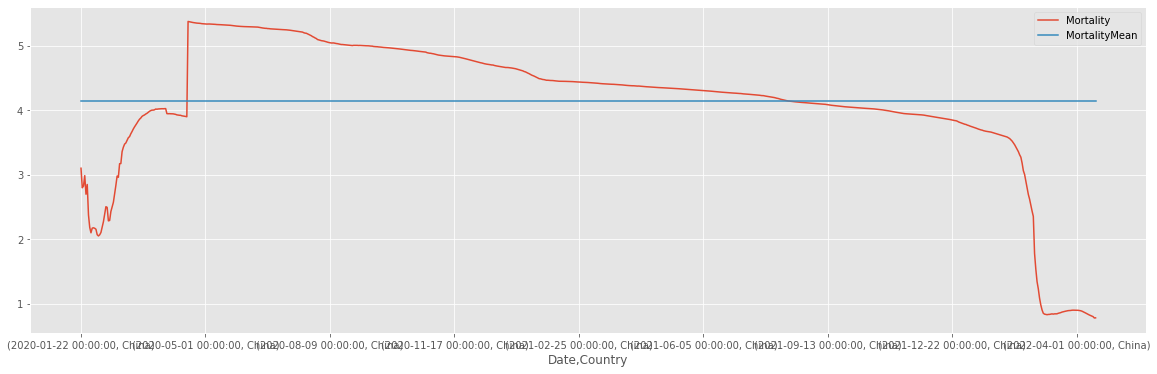

In [123]:
# Ваш код здесь

plt.rcParams['figure.figsize'] = (20, 6)

model_mean_pred = gm1["Mortality"].mean()
# Запишем это значение в MortalityMean

gm1["MortalityMean"] = model_mean_pred
gm1.plot(kind="line", y = ["Mortality", "MortalityMean"])


#### 3.2. Линейная модель (Linear Trend Model) (5 баллов)

Осуществите предсказание с помощью линейного тренда

In [124]:
# Ваш код здесь

# Введем индекс
gm1.count()


Confirmed          816
Recovered          816
Deaths             816
Mortality          816
MortalityShift1    815
MortalityDiff      815
MortalityMean      816
dtype: int64

In [125]:
gm1["timeIndex"] = range(0, 816)
gm1

,,Confirmed,Recovered,Deaths,Mortality,MortalityShift1,MortalityDiff,MortalityMean,timeIndex
Date,Country,,,,,,,,
2020-01-22,China,548,28.00,17,3.10,NaN,NaN,4.14,0
2020-01-23,China,643,30.00,18,2.80,3.10,-0.30,4.14,1
2020-01-24,China,920,36.00,26,2.83,2.80,0.03,4.14,2
2020-01-25,China,1406,39.00,42,2.99,2.83,0.16,4.14,3
2020-01-26,China,2075,49.00,56,2.70,2.99,-0.29,4.14,4
...,...,...,...,...,...,...,...,...,...
2022-04-12,China,1655477,0.00,13524,0.82,0.83,-0.01,4.14,811
2022-04-13,China,1681437,0.00,13586,0.81,0.82,-0.01,4.14,812
2022-04-14,China,1705231,0.00,13640,0.80,0.81,-0.01,4.14,813


In [126]:
# Построим линейную регрессию и выведем саммари по ней

model_linear = smf.ols('Mortality ~ timeIndex', data = gm1).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mortality   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     279.6
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.53e-54
Time:                        18:45:37   Log-Likelihood:                -1076.7
No. Observations:                 816   AIC:                             2157.
Df Residuals:                     814   BIC:                             2167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0594      0.063     79.792      0.000       4.935       5.184
timeIndex     -0.0023      0.000    -16.722      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      316.687   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              854.037
Skew:                          -2.071   Prob(JB):                    3.53e-186
Kurtosis:                       5.821   Cond. No.                         941.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
# Выведем параметры нашей линейной модели

model_linear.params

Intercept    5.06
timeIndex   -0.00
dtype: float64

In [128]:
c = model_linear.params[0]
c

5.0593735709695355

In [129]:
m = model_linear.params[1]
m

-0.002252611105847923

In [130]:
model_linear_pred = model_linear.predict()


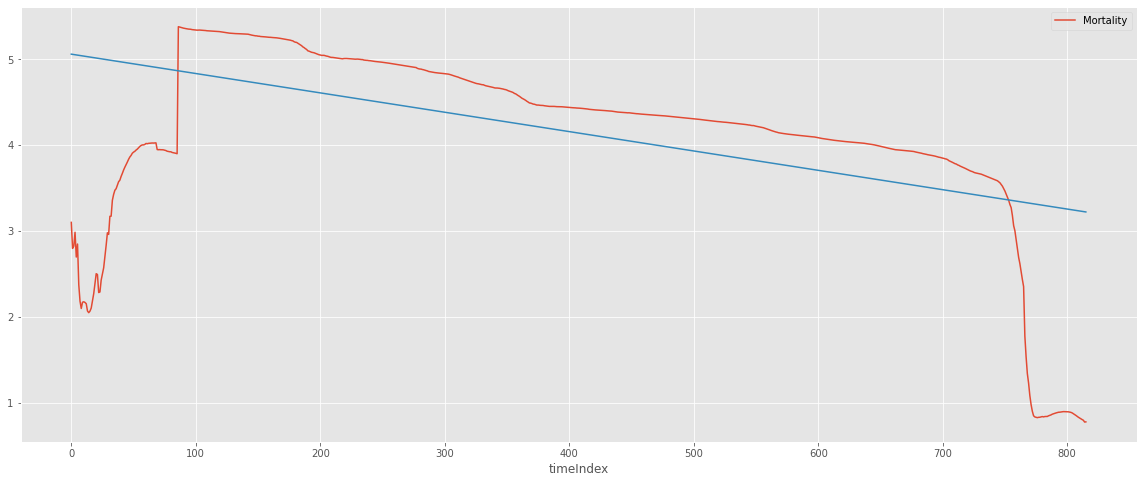

In [131]:
plt.rcParams['figure.figsize'] = (20, 8)
gm1.plot(kind="line", x="timeIndex", y = "Mortality")
plt.plot(gm1.timeIndex, model_linear_pred, '-')
gm1["Mortality_Linear"] = model_linear_pred


In [132]:
# Для моделирования далее будем использовать модель ARIMA, построенную для ряда первых разностей.
# Итак, чтобы построить модель нам нужно знать ее порядок, состоящий из 2-х параметров:

# p — порядок компоненты AR
# d — порядок интегрированного ряда (порядок разности временного ряда)
# q — порядок компонетны MA
# Параметр d равет 1, осталось определить p и q. Для их определения нам надо изучить авторкорреляционную (ACF) и частично автокорреляционную (PACF) функции для ряда первых разностей. 
# ACF поможет нам определить q, т. к. по ее коррелограмме можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA PACF поможет нам определить p, т. к. по ее коррелограмме можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.

# Чтобы построить соответствующие коррелограммы, в пакете statsmodels имеются следующие функции: acf и pacf.
# Можем построить графики ACF и PACF, у которых по оси X откладываются номера лагов, а по оси Y значения соответствующих функций. 
# Нужно отметить, что количество лагов в функциях и определяет число значимых коэффициентов.

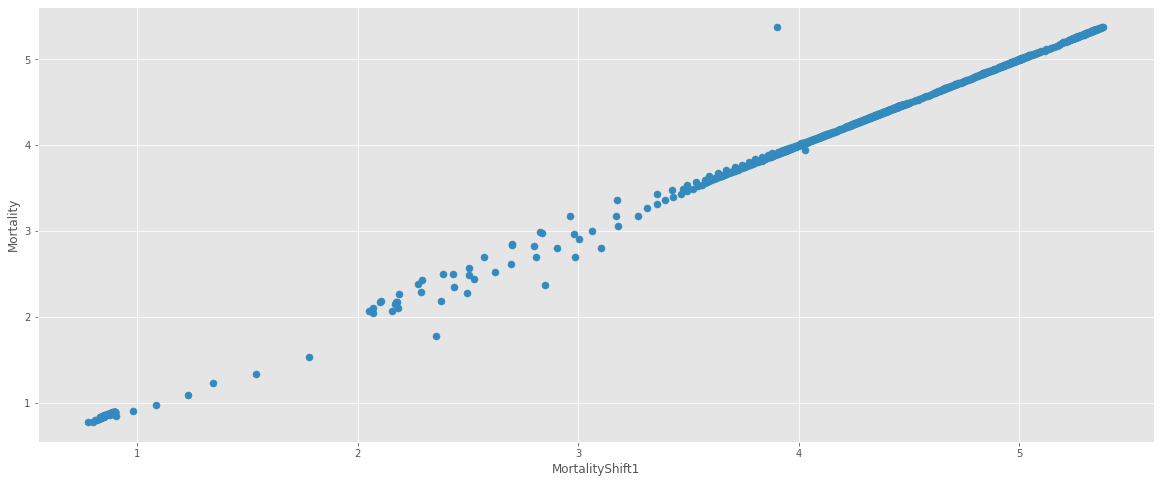

In [133]:
ts = gm1.Mortality
# Для дальнейших расчетов представим временной ряд в виде последовательности разницы между значениями

# Рассчитаем лаги
gm1["MortalityShift1"] = gm1.Mortality.shift()
gm1["MortalityDiff"] = gm1.Mortality - gm1.MortalityShift1


# Выведем на графике Mortality и MortalityShift1
gm1.plot(kind= "scatter", y = "Mortality", x = "MortalityShift1", s = 50)

In [134]:
ts_diff = gm1.MortalityDiff
ts_diff.dropna(inplace = True)

In [135]:
from statsmodels.tsa.arima.model import ARIMA

ts_diff.head()

Date        Country
2020-01-23  China     -0.30
2020-01-24  China      0.03
2020-01-25  China      0.16
2020-01-26  China     -0.29
2020-01-27  China      0.15
Name: MortalityDiff, dtype: float64

#### 3.3. Скользящее среднее (MA - Moving average) (5 баллов)

Постройте предсказание с помощью модели MA. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете)

In [159]:
# Ваш код здесь


from statsmodels.tsa.arima_model import ARMA

# contrived dataset
data = ts_diff
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

815   -0.00
dtype: float64


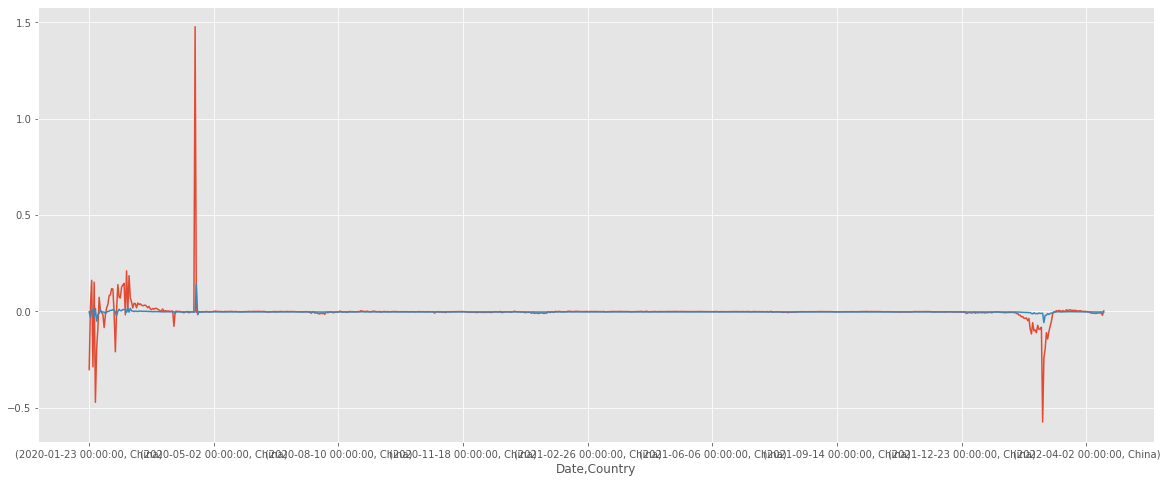

In [160]:
ts_diff.plot()
model_fit.fittedvalues.plot()

#### 3.4. Авторегрессионная модель (AR - Autoregressive model) (5 баллов)

Постройте предсказание с помощью модели AR. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете)

In [157]:
# Ваш код здесь

from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = ts_diff

model = AR(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)


815   -0.01
dtype: float64


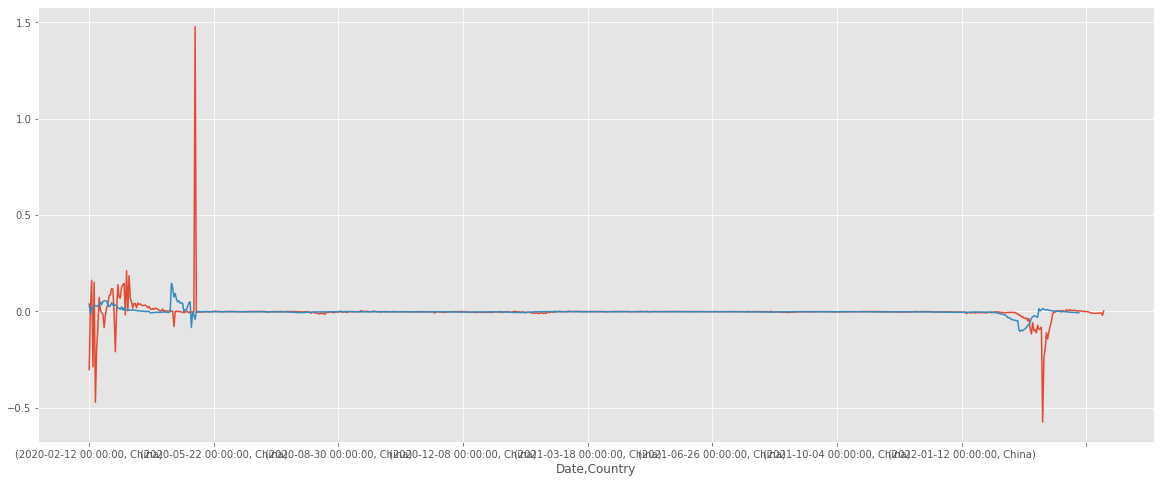

In [158]:
ts_diff.plot()
model_fit.fittedvalues.plot()

#### 3.5. ARMA (5 баллов)

Постройте предсказание, скомбинировав модели AR и MA. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете)

In [161]:
# Ваш код здесь


# ARMA example
from statsmodels.tsa.arima_model import ARMA

# contrived dataset
data = data = ts_diff
# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

815   -0.01
dtype: float64


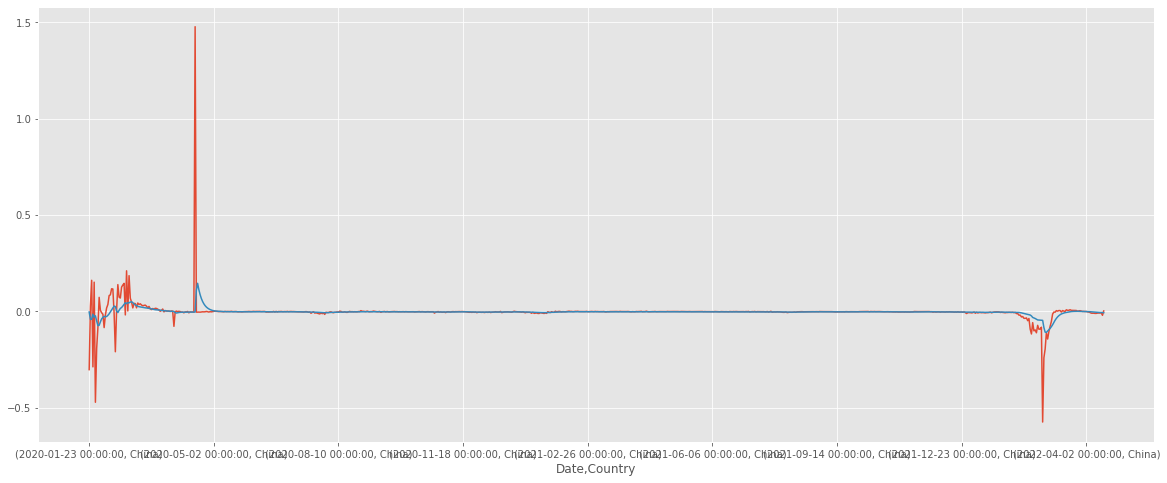

In [162]:
ts_diff.plot()
model_fit.fittedvalues.plot()

#### 3.6. Интегрированная модель авторегрессии — скользящего среднего (Auto Regressive Integrated Moving Average) - ARIMA (5 баллов)

Постройте предсказание, модернизировав модель ARMA и добавив интегрирующую компоненту. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете)

In [146]:
# Ваш код здесь

# ARIMA Model (1,0,1)
model_AR1MA = ARIMA(ts_diff, order=(1,0,1))
results_ARIMA = model_AR1MA.fit()
results_ARIMA.fittedvalues.head()

In [ ]:
ts_diff.plot()
results_ARIMA.fittedvalues.plot()

In [ ]:
predictions_ARIMA_diff.sum()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

In [ ]:
ts.iloc[0]

In [ ]:
predictions_ARIMA_log = pd.Series(ts.iloc[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.tail()

In [ ]:
gm1['MortalityARIMA'] = predictions_ARIMA_log
gm1.plot(kind="line", x="timeIndex", y = ["Mortality", "MortalityARIMA"])

In [ ]:
gm1.plot(kind="line", x="timeIndex", y = ["Mortality", "MortalityMean", "Mortality_Linear", "MortalityARIMA"])

#### 3.7. SARIMA (Seasonal Auto Regressive Integrated Moving Average) (5 баллов и 5 бонусных баллов)

Постройте предсказание, модернизировав модель ARIMA и добавив сезонную составляющую. Обязательно поэкспериментируйте с гиперпараметрами модели (и опишите, что вы делаете).

Бонусные баллы за это задание выставляются как совокупность за все задания по классам SARIMA (3.3 - 3.7), в случае если ваши модели получились хорошие, точные и вы верно настроили гиперпараметры, хорошо описав ваши действия.

*Примечание. Вы можете также почитать про Алгоритм Хиндмана-Хандакара для настройки SARIMA. Возможно, он сможет вам помочь и улучшить качество моделей*

In [164]:
# Ваш код здесь


from statsmodels.tsa.statespace.sarimax import SARIMAX



# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(2, 2, 2, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

815   -0.02
dtype: float64


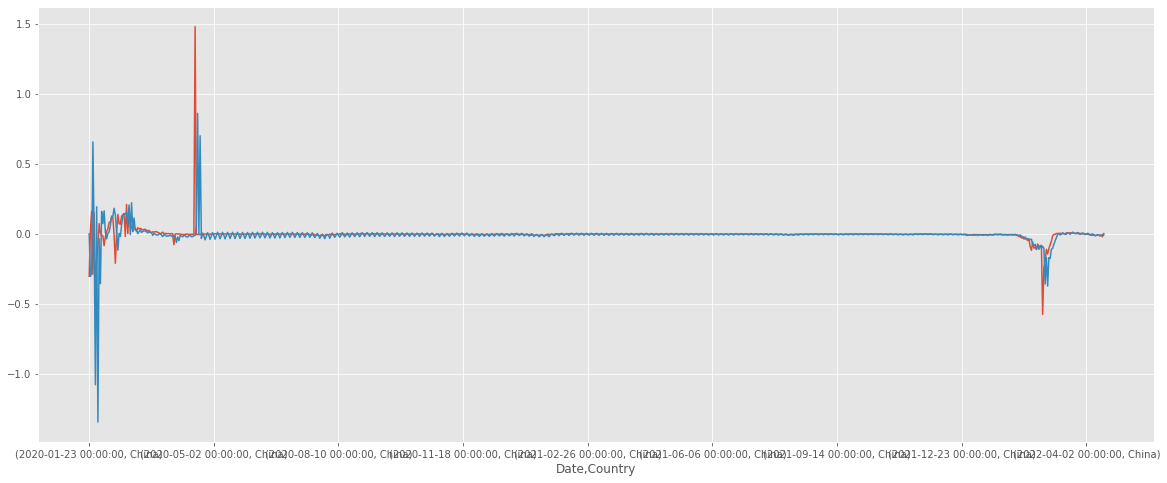

In [165]:
ts_diff.plot()
model_fit.fittedvalues.plot()

#### 3.8. ETS - Экспоненциальное сглаживание (Exponential smoothing) (15 баллов и 15 бонусных баллов)

Задание на основные баллы:

- Поработайте с классом моделей ETS (Exponential smoothing), подробно рассматривавшемся на лекции. Примените ETS(ANN), ETS(AAA) и еще минимум 3 любые (на ваш выбор) модели ETS. Осуществите настройку гиперпараметров во всех моделях. Сравните результаты между ними. Попробуйте объяснить, почему модели показывают такие результаты и такую разницу в результатах. Сделайте выводы.

Задания на бонусные баллы:

- Попробуйте теперь обучить ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`). Что делает этот алгоритм? Что такое AIC? Какие результаты получаются? Сделайте выводы.

- Попробуйте также применить Double exponential smoothing и Triple exponential smoothing. Что это за модели? Какие результаты показывают они? Почему? Сделайте выводы.

- Нарисуйте для наилучшей модели предсказания **с доверительным интервалом** (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель не выдает доверительные интервалы сразу, но при желании до них можно дотянуться!

In [170]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

In [179]:
# Ваш код здесь


# data = ...
# create class
model = ExponentialSmoothing(data)
# fit model
# model_fit = model.fit(data)
# make prediction
yhat = model_fit.predict()
yhat


Date        Country
2020-01-23  China      0.00
2020-01-24  China     -0.30
2020-01-25  China     -0.28
2020-01-26  China      0.66
2020-01-27  China     -0.04
                       ... 
2022-04-12  China     -0.01
2022-04-13  China     -0.02
2022-04-14  China     -0.01
2022-04-15  China     -0.00
2022-04-16  China     -0.01
Name: predicted_mean, Length: 815, dtype: float64

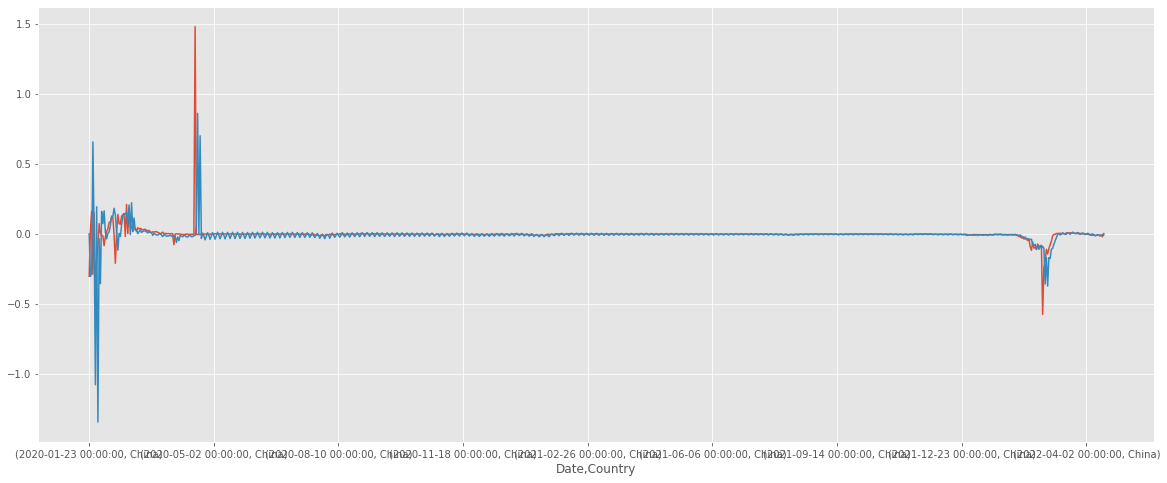

In [180]:
ts_diff.plot()
model_fit.fittedvalues.plot()

#### 3.9. KTR из orbit (8 бонусных баллов).

Попробуйте использовать модель KTR из библиотеки orbit для предсказания временных рядов.



In [150]:
# from orbit.models.ktrlite import KTRLite

In [151]:
# Ваш код здесь

#### 3.10. Библиотека Prophet (10 бонусных баллов)
Попробуйте использовать библиотеку Prophet для предсказания временных рядов. [Документация](https://facebook.github.io/prophet/docs/quick_start.html).

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.


In [181]:
pip install fbprophet
from prophet import Prophet

In [196]:
# Ваш код здесь

predictions = 30

ff = ts_diff.reset_index()
# ff.columns = [['ds', 'y']]

m = Prophet()
# m.fit(ts_diff)


# future = m.make_future_dataframe(periods=predictions)
# forecast = m.predict(future)

#### 3.11 Линейная модель с регрессией (Linear Regression Model) (5 баллов и 10 бонусных баллов)

Примените линейную модель с регрессией для предсказания временных рядов.
Какие признаки оказались наиболее значимыми? Почему? Как вы это интерпретируете? Какие выводы можно сделать?

*Примечание. Это задание идет в тесной связке с заданием 1.8.*



In [154]:
# Ваш код здесь



#### 3.12. Дополнительная модель (10 бонусных баллов)

Используйте еще одну какую-нибудь любую другую известную вам модель для предсказания временных рядов и заработайте дополнительные бонусные баллы!

In [194]:
# Ваш код здесь


# ARMA_new


# contrived dataset
data = ts_diff
# fit model
model = ARMA(data, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)





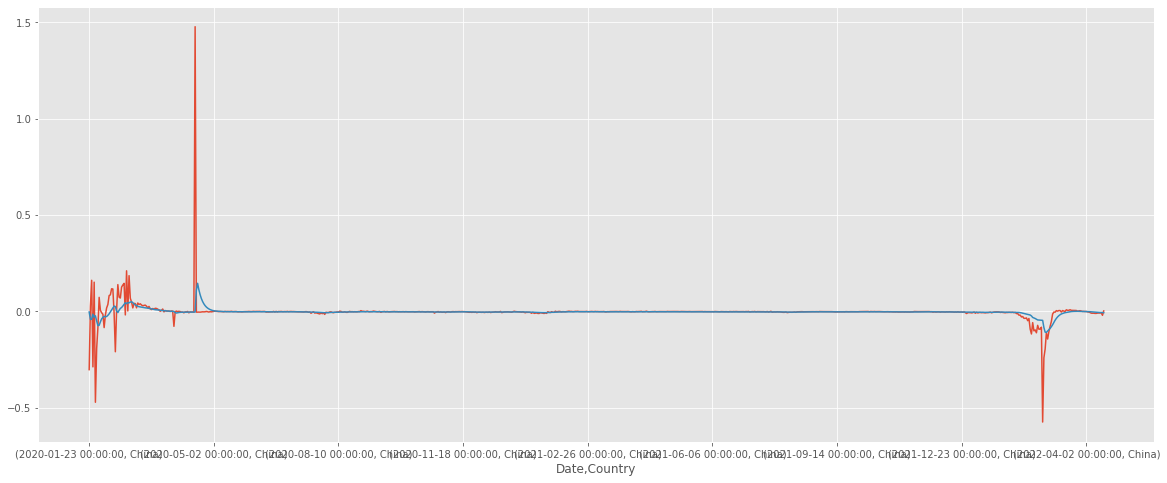

In [195]:
ts_diff.plot()
model_fit.fittedvalues.plot()


#### 3.13 Выводы (5 баллов)

Выведите все построенные вами модели на одних осях. Выведите общую сравнительную табличку по всем моделям, которые вы оценивали. Какие выводы вы можете сделать? Какая модель показала себя лучше всего? Как вы думаете почему? Одинаковые ли результаты эффективности получились у моделей на разных временных рядах? Какие итоги вы можете подвести по сравнению моделей друг с другом?


<здесь место для ваших выводов>

## Выводы по работе (5 баллов)

Напишите итоговые выводы по всему проделанному исследованию. С какими данными (временными рядами) вам понравилось работать, а с какими нет? Какие модели показались вам простыми и удобными, а какие менее понравились? Выявили ли вы какие-то закономерности в применимости моделей? Если в ходе работы, вы пробовали где-то разные варианты, разные подходы, и это не попало в описание предыдущих действий, опишите их тут. Что можно сказать в целом о том, как мы решили задачу, изначально поставленную перед нами? Подведите окончательные итоги

<здесь место для ваших выводов>

Мы ознакомились с разными подходами к анализу и прогнозированию временных рядов.
Была рассмотрена интегрированная модель авторегрессии – скользящего среднего (ARIMA), как базовая модель прогнозирования.
